In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from ipywidgets import *


In [2]:
test_data_path = 'test_data/data.json'
data_dict = None
with open(test_data_path) as f:
    data_dict = json.load(f)

interactive(children=(IntSlider(value=0, description='frame', max=300), Output()), _dom_classes=('widget-inter…

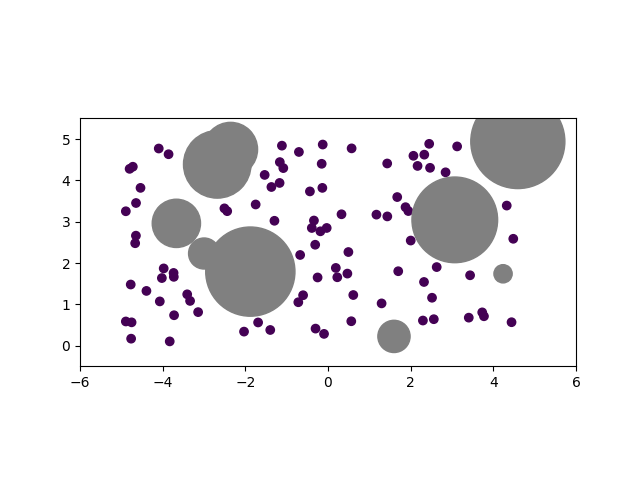

In [30]:
%matplotlib ipympl
fig, ax = plt.subplots()

ax.set_xlim([data_dict['left_border'], data_dict['right_border']])
ax.set_ylim([data_dict['bottom_border'], data_dict['top_border']])
ax.set_aspect('equal')

circles = []
particles_scatter = ax.scatter([], [], c=[], norm=plt.Normalize(0,1))
for object_id in range(len(data_dict['object_sizes'])):
        object_x, object_y = data_dict['object_positions'][object_id][0][0], data_dict['object_positions'][object_id][0][1]
        circle = plt.Circle((object_x, object_y), data_dict['object_sizes'][object_id], color='grey')
        circles.append(circle)
        ax.add_patch(circle)

def update(frame = 0):
    for object_id in range(len(data_dict['object_sizes'])):
        object_x, object_y = data_dict['object_positions'][object_id][frame][0], data_dict['object_positions'][object_id][frame][1]
        circles[object_id].center = object_x, object_y
        
    particles_x, particles_y = [], []
    particle_positions = []
    particle_colors = []

    for particle_id in range(len(data_dict['particle_positions'])):
        particle_x, particle_y = None, None
        particle_color = 0
        if len(data_dict['particle_positions'][particle_id]):
            if frame >= len(data_dict['particle_positions'][particle_id]):
                particle_x, particle_y = data_dict['particle_positions'][particle_id][-1][0], data_dict['particle_positions'][particle_id][-1][1]
                particle_color = 1
            else:
                particle_x, particle_y = data_dict['particle_positions'][particle_id][frame][0], data_dict['particle_positions'][particle_id][frame][1]
        particle_positions.append([particle_x, particle_y])
        particle_colors.append(particle_color)
        particles_x.append(particle_x)
        particles_y.append(particle_y)
    particles_scatter.set_offsets(particle_positions)
    particles_scatter.set_array(particle_colors)
    fig.canvas.draw_idle()

interact(update, frame = (0, data_dict['end_frame'], 1));